In [14]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

unsupervised_data = pd.read_csv("Data.csv")
unsupervised_data = unsupervised_data.dropna()
#supervised_data = pd.read_csv("SupervisedData.csv")

In [16]:
def LinearAnalysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return X_test, y_pred

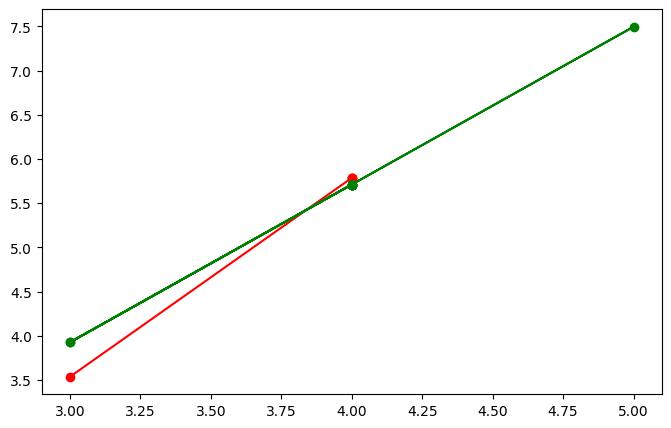

In [17]:
UDWithout = unsupervised_data[unsupervised_data['With_Or_Without'] == 0]
UDWith = unsupervised_data[unsupervised_data['With_Or_Without'] == 1]

X_Without = UDWithout[['Par']]
y_without = UDWithout['Score']
X_With = UDWith[['Par']]
y_with = UDWith['Score']

X_test_without, y_pred_without = LinearAnalysis(X_Without, y_without)

plt.figure(figsize=(8,5))
plt.scatter(X_test_without, y_pred_without, color="red")
plt.plot(X_test_without, y_pred_without, color="red")

X_test_with, y_pred_with = LinearAnalysis(X_With, y_with)

plt.scatter(X_test_with, y_pred_with, color="green")
plt.plot(X_test_with, y_pred_with, color="green")
plt.show()

In [28]:
def SignificanceTest(Without, With):
    Without_3 = Without[Without['Par'] == 3]
    With_3 = With[With['Par'] == 3]
    y_Without_3 = Without_3[['Score']].to_numpy()
    y_With_3 = With_3[['Score']].to_numpy()
    Without_4 = Without[Without['Par'] == 4]
    With_4 = With[With['Par'] == 4]
    y_Without_4 = Without_4[['Score']].to_numpy()
    y_With_4 = With_4[['Score']].to_numpy()
    Without_5 = Without[Without['Par'] == 5]
    With_5 = With[With['Par'] == 5]
    y_Without_5 = Without_5[['Score']].to_numpy()
    y_With_5 = With_5[['Score']].to_numpy()

    t_stat3, p_value3 = stats.ttest_ind(y_Without_3, y_With_3)
    print("Par 3 T-Test")
    print(t_stat3)
    print(p_value3)

    t_stat4, p_value4 = stats.ttest_ind(y_Without_4, y_With_4)
    print("Par 4 T-Test")
    print(t_stat4)
    print(p_value4)

    t_stat5, p_value5 = stats.ttest_ind(y_Without_5, y_With_5)
    print("Par 5 T-Test")
    print(t_stat5)
    print(p_value5)

    u_stat3, pu_value3 = stats.mannwhitneyu(y_Without_3, y_With_3, alternative='two-sided')
    print("Par 3 Mann-Whitney U Test")
    print(u_stat3)
    print(pu_value3)

    u_stat4, pu_value4 = stats.ttest_ind(y_Without_4, y_With_4, alternative='two-sided')
    print("Par 4 Mann-Whitney U Test")
    print(u_stat4)
    print(pu_value4)

    u_stat5, pu_value5 = stats.ttest_ind(y_Without_5, y_With_5, alternative='two-sided')
    print("Par 5 Mann-Whitney U Test")
    print(u_stat5)
    print(pu_value5)

In [29]:
SignificanceTest(UDWithout, UDWith)

Par 3 T-Test
[-0.48412292]
[0.63872595]
Par 4 T-Test
[0.]
[1.]
Par 5 T-Test
[0.8660254]
[0.41975309]
Par 3 Mann-Whitney U Test
[12.]
[0.84475355]
Par 4 Mann-Whitney U Test
[0.]
[1.]
Par 5 Mann-Whitney U Test
[0.8660254]
[0.41975309]
